In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


(예제 2)
독일 신용데이터가 아래와 같이 주어졌다. 돈을 갚을 능력이 있는 사람(Risk:0)과 돈을 갚을 능력이 없는 사람(Risk:1)인 사람의 부채 평균을 살펴보고 싶다

In [14]:

german_credit_dataset = pd.read_csv('german_dataset.csv',  index_col=0)
german_credit_dataset.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [15]:
german_dataset.amount.median()

2319.5

In [16]:
german_dataset.amount.sample(100,replace=True).median() #replace true means 'random sampling with replacement'

2086.5

In [17]:
german_dataset.amount.sample(100,replace=True).median()

1939.5

In [18]:
german_dataset_sample_meds=[]
for _ in range(500):
    samp_med =german_dataset.amount.sample(200,replace=True).median()
    german_dataset_sample_meds.append(samp_med)

In [19]:
print('bootstrap median:', np.mean(german_dataset_sample_meds))
print('bootstrap medians std:', np.std(german_dataset_sample_meds))

bootstrap median: 2308.878
bootstrap medians std: 157.2370030113777


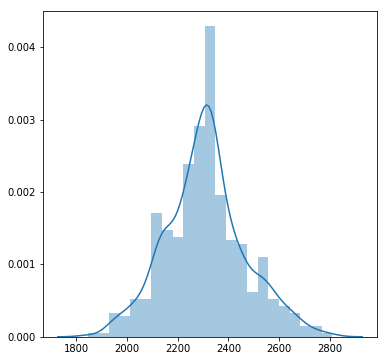

In [20]:
plt.rcParams["figure.figsize"] = (6, 6)
sns.distplot(german_dataset_sample_meds, kde=True) # 씨본의 distplot 명령은 러그(선)와 커널 밀도 표시 기능이 있어 맷플롯라이브러리보다 많이 사용

# Dynamic rc settings _ can dynamically change the default rc setting in a python script
# all of the rc settings are stored in a dictionary-like variable called ** matplotlib.rcParams**
# rcParams can be modified directly  for example..
"""
 import matplotlib as mpl
  mpl.rcParams['lines.linewidth'] = 2
  mpl.rcParams['lines.color'] = 'r'
"""

###... for more detail [TIL/Machine Learning/커널밀도(Kernel Density Estimation_KDE).ipynb]

In [21]:
# 90 %
ci_min = np.percentile(german_dataset_sample_meds,5)
ci_max = np.percentile(german_dataset_sample_meds,95)

print('90% CI lower:', ci_min)
print('90% CI upper:', ci_max)

90% CI lower: 2050.325
90% CI upper: 2592.0
